# **Imported libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder,LabelEncoder
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats
from sklearn.linear_model import LogisticRegression
from fuzzywuzzy import process
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
from sklearn.metrics import f1_score, classification_report
import os

import warnings
warnings.filterwarnings('ignore')

C:\Users\Ricardo\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
import imblearn
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)



from sklearn.impute import SimpleImputer
from sklearn import metrics


pd.set_option("display.max_columns", None)


pd.set_option("display.float_format", lambda x: "%.3f" % x)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
)

# **Loading Data**

In [5]:
data_train = pd.read_csv("train_data.csv", low_memory=False)
data_test = pd.read_csv("test_data.csv",low_memory=False) 

In [6]:
data_train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.000,N,2020-01-01,N,0.000,1988.000,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.000,RETAIL TRADE,I,NaN,27.000,FROM LIQUID OR GREASE SPILLS,10.000,CONTUSION,62.000,BUTTOCKS,13662,0.000,Not Work Related,1.000
1,2019-08-30,46.000,N,2020-01-01,Y,1745.930,1973.000,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.000,23.000,CONSTRUCTION,I,NaN,97.000,REPETITIVE MOTION,49.000,SPRAIN OR TEAR,38.000,SHOULDER(S),14569,1.000,Not Work Related,4.000
2,2019-12-06,40.000,N,2020-01-01,N,1434.800,1979.000,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.000,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.000,OBJECT BEING LIFTED OR HANDLED,7.000,CONCUSSION,10.000,MULTIPLE HEAD INJURY,12589,0.000,Not Work Related,6.000
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.000,N,2020-01-01,N,NaN,1958.000,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.000,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.000,"HAND TOOL, UTENSIL; NOT POWERED",43.000,PUNCTURE,36.000,FINGER(S),12603,0.000,Not Work Related,1.000


In [7]:
data_test.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.000,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,6165911,BRONX,N,NYC,NaN,M,NaN,48.000,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.000,"FALL, SLIP OR TRIP, NOC",10.000,CONTUSION,54.000,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.000,2023-01-02,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,6166141,QUEENS,N,NYC,NaN,F,NaN,45.000,RETAIL TRADE,IV,NaN,75.000,FALLING OR FLYING OBJECT,10.000,CONTUSION,10.000,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.000,1963.000,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,1A. PRIVATE,6165907,WESTCHESTER,N,NYC,NaN,F,NaN,56.000,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.000,STATIONARY OBJECT,49.000,SPRAIN OR TEAR,62.000,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.000,0.000,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,6166047,QUEENS,N,NYC,NaN,F,NaN,48.000,TRANSPORTATION AND WAREHOUSING,IV,NaN,25.000,FROM DIFFERENT LEVEL (ELEVATION),10.000,CONTUSION,53.000,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.000,1997.000,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,6166102,KINGS,N,NYC,NaN,M,NaN,55.000,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,NaN,79.000,OBJECT BEING LIFTED OR HANDLED,40.000,LACERATION,37.000,THUMB,11212,5


# **Rows Missing Target Variable and Null Columns**

In [9]:
df_train=data_train.copy()
df_test=data_test.copy()

In [10]:
#drop OIICS Nature of Injury Description since it has 100% missing values
df_train.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
df_test.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

In [11]:
# drop rows from df_train where Claim Injury Type (target variable) is missing (3% of the dataset)
df_train.dropna(subset=['Claim Injury Type'], inplace=True)

In [12]:
#drop Agreement Reached and WCB Decision since they are not on the test dataset and we're not building a model to predict these in this part of the assignment
df_train.drop(columns=['Agreement Reached'], inplace=True)
df_train.drop(columns=['WCB Decision'], inplace=True)

In [13]:
df_train.set_index('Claim Identifier', inplace=True)
df_test.set_index('Claim Identifier', inplace=True)

In [14]:
df_train.shape

(574026, 29)

In [15]:
df_test.shape

(387975, 28)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 5393875 to 6165075
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Accident Date                      570337 non-null  object 
 1   Age at Injury                      574026 non-null  float64
 2   Alternative Dispute Resolution     574026 non-null  object 
 3   Assembly Date                      574026 non-null  object 
 4   Attorney/Representative            574026 non-null  object 
 5   Average Weekly Wage                545375 non-null  float64
 6   Birth Year                         544948 non-null  float64
 7   C-2 Date                           559466 non-null  object 
 8   C-3 Date                           187245 non-null  object 
 9   Carrier Name                       574026 non-null  object 
 10  Carrier Type                       574026 non-null  object 
 11  Claim Injury Type                  57

# **Data Type conversions**

In [18]:
# Convert Accident Date to datetime
df_train['Accident Date'] = pd.to_datetime(df_train['Accident Date'])
df_test['Accident Date'] = pd.to_datetime(df_test['Accident Date'])

#Convert Age at Injury to an int
df_train['Age at Injury'] = df_train['Age at Injury'].astype("int")
df_test['Age at Injury']=df_test['Age at Injury'].astype("int")

# change Alternative Dispute Resolution to category
df_train['Alternative Dispute Resolution'] = df_train['Alternative Dispute Resolution'].astype('category')
df_test['Alternative Dispute Resolution'] = df_test['Alternative Dispute Resolution'].astype('category')

# Convert Assembly Date to datetime
df_train['Assembly Date'] = pd.to_datetime(df_train['Assembly Date'])
df_test['Assembly Date'] = pd.to_datetime(df_test['Assembly Date'])

# Change Attorney/Representative to Category
df_train['Attorney/Representative'] = df_train['Attorney/Representative'].astype('category')
df_test['Attorney/Representative'] = df_test['Attorney/Representative'].astype('category')

#Convert Birth Year to an int
df_train['Birth Year'] = df_train['Birth Year'].astype("Int64")
df_test['Birth Year']=df_test['Birth Year'].astype("Int64")

# Convert C-2 Date to datetime
df_train['C-2 Date'] = pd.to_datetime(df_train['C-2 Date'])
df_test['C-2 Date'] = pd.to_datetime(df_test['C-2 Date'])

# Convert C-3 Date to datetime
df_train['C-3 Date'] = pd.to_datetime(df_train['C-3 Date'])
df_test['C-3 Date'] = pd.to_datetime(df_test['C-3 Date'])

# convert Carrier Name to category
df_train['Carrier Name'] = df_train['Carrier Name'].astype('category')
df_test['Carrier Name'] = df_test['Carrier Name'].astype('category')

# convert Carrier Type to Category
df_train['Carrier Type'] = df_train['Carrier Type'].astype('category')
df_test['Carrier Type'] = df_test['Carrier Type'].astype('category')

# change county of injury to categorical
df_train['County of Injury'] = df_train['County of Injury'].astype('category')
df_test['County of Injury'] = df_test['County of Injury'].astype('category')

# change COVID-19 Indicator to categorical
df_train['COVID-19 Indicator'] = df_train['COVID-19 Indicator'].astype('category')
df_test['COVID-19 Indicator'] = df_test['COVID-19 Indicator'].astype('category')

# Change district name to categorical
df_train['District Name'] = df_train['District Name'].astype('category')
df_test['District Name'] = df_test['District Name'].astype('category')

# Convert First Hearing Date to datetime
df_train['First Hearing Date'] = pd.to_datetime(df_train['First Hearing Date'])
df_test['First Hearing Date'] = pd.to_datetime(df_test['First Hearing Date'])

# change Gender to categorical
df_train['Gender'] = df_train['Gender'].astype('category')
df_test['Gender'] = df_test['Gender'].astype('category')

# Converted IME-4 Count to an int
df_train['IME-4 Count'] = df_train['IME-4 Count'].astype("Int64")
df_test['IME-4 Count'] = df_test['IME-4 Count'].astype("Int64")

# Converted Industry Code tocategory
df_train['Industry Code'] = df_train['Industry Code'].astype('category')
df_test['Industry Code'] = df_test['Industry Code'].astype('category')

# change medical fee region to category
df_train['Medical Fee Region'] = df_train['Medical Fee Region'].astype('category')
df_test['Medical Fee Region'] = df_test['Medical Fee Region'].astype('category')

# Converted WCIO Cause of Injury Code to Category
df_train['WCIO Cause of Injury Code'] = df_train['WCIO Cause of Injury Code'].astype('category')
df_test['WCIO Cause of Injury Code'] = df_test['WCIO Cause of Injury Code'].astype('category')

# Converted WCIO Nature of Injury Code to a category
df_train['WCIO Nature of Injury Code'] = df_train['WCIO Nature of Injury Code'].astype('category')
df_test['WCIO Nature of Injury Code'] = df_test['WCIO Nature of Injury Code'].astype('category')

# Converted WCIO Part Of Body Code to categorical
df_train['WCIO Part Of Body Code'] = df_train['WCIO Part Of Body Code'].astype('category')
df_test['WCIO Part Of Body Code'] = df_test['WCIO Part Of Body Code'].astype('category')

# Convert Zip Code to category
df_train['Zip Code'] = df_train['Zip Code'].astype('category')
df_test['Zip Code'] = df_test['Zip Code'].astype('category')

#Convert Claim Injury Type to Category
df_train['Claim Injury Type'] = df_train['Claim Injury Type'].astype('category')

# Converted Number of Dependents to an int
df_train["Number of Dependents"] = df_train["Number of Dependents"].astype("int")
df_test["Number of Dependents"] = df_test["Number of Dependents"].astype("int")

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 5393875 to 6165075
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570337 non-null  datetime64[ns]
 1   Age at Injury                      574026 non-null  int32         
 2   Alternative Dispute Resolution     574026 non-null  category      
 3   Assembly Date                      574026 non-null  datetime64[ns]
 4   Attorney/Representative            574026 non-null  category      
 5   Average Weekly Wage                545375 non-null  float64       
 6   Birth Year                         544948 non-null  Int64         
 7   C-2 Date                           559466 non-null  datetime64[ns]
 8   C-3 Date                           187245 non-null  datetime64[ns]
 9   Carrier Name                       574026 non-null  category      
 10  Carrier Type      

# **Hold-out Method**

## **Train-Test Split**

In [22]:
X = df_train.drop(columns=['Claim Injury Type'])
# Defining the target variable and converting to numerical
target_mapping = dict(enumerate(df_train["Claim Injury Type"].cat.categories))
# Convert to numerical using cat.codes
y = df_train["Claim Injury Type"].cat.codes

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.7, random_state=42,stratify=y)

### **Pre-Processing**

In [24]:
train_data = X_train.copy()
val_data = X_val.copy()
test_data = df_test.copy()

#### **Missing Values And Incoherencies**

The decisions that we will make are in conformity with the establishement of this sequence of events:\
 1- Accident Date\
 2- C-2 Date\
 3- C-3 Date\
 4- Assembly Date\
 5- First Hearing Date

In [27]:
train_data.isna().sum()

Accident Date                          2587
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   20066
Birth Year                            20250
C-2 Date                              10187
C-3 Date                             271096
Carrier Name                              0
Carrier Type                              0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   296314
Gender                                    0
IME-4 Count                          308855
Industry Code                          6969
Industry Code Description              6969
Medical Fee Region                        0
WCIO Cause of Injury Code             10945
WCIO Cause of Injury Description      10945
WCIO Nature of Injury Code      

In [28]:
#Accident Date
#we defined an order and we will check if that order is followed
#we believe that it does not make much sense that events related to an accident happen before the accident, so we checked the existence of these cases
print('Number of rows in which Assembly Date was before the Accident Date:',train_data[train_data['Accident Date']>train_data['Assembly Date']].shape[0])
print('Number of rows in which C-2 Date was before the Accident Date:',train_data[train_data['Accident Date']>train_data['C-2 Date']].shape[0])
print('Number of rows in which C-3 Date was before the Accident Date:',train_data[train_data['Accident Date']>train_data['C-3 Date']].shape[0])
print('Number of rows in which First Hearing Date was before the Accident Date:',train_data[train_data['Accident Date']>train_data['First Hearing Date']].shape[0])
#There are definitely inconsistencies
# Create flags for inconsistencies in Accident Date
train_data['Accident_Date_Flag'] = ((train_data['Accident Date'] > train_data['Assembly Date']) |
                                    (train_data['Accident Date'] > train_data['C-2 Date']) |
                                    (train_data['Accident Date'] > train_data['C-3 Date']) |
                                    (train_data['Accident Date'] > train_data['First Hearing Date'])).astype(int)

# Similarly, you can create flags in val_data and test_data
val_data['Accident_Date_Flag'] = ((val_data['Accident Date'] > val_data['Assembly Date']) |
                                  (val_data['Accident Date'] > val_data['C-2 Date']) |
                                  (val_data['Accident Date'] > val_data['C-3 Date']) |
                                  (val_data['Accident Date'] > val_data['First Hearing Date'])).astype(int)

test_data['Accident_Date_Flag'] = ((test_data['Accident Date'] > test_data['Assembly Date']) |
                                   (test_data['Accident Date'] > test_data['C-2 Date']) |
                                   (test_data['Accident Date'] > test_data['C-3 Date']) |
                                   (test_data['Accident Date'] > test_data['First Hearing Date'])).astype(int)

#because at most the accident date is in the date of the following occured event
train_data.loc[:,'Accident Date']=train_data['Accident Date'].fillna(train_data['C-2 Date'])
#There were still missing values so we filled them with the next event
train_data.loc[:,'Accident Date']=train_data['Accident Date'].fillna(train_data['C-3 Date'])
#There were still missing values so we filled them with the next event
train_data.loc[:,'Accident Date']=train_data['Accident Date'].fillna(train_data['Assembly Date'])
# Get the mode of C-2 Date and Assembly Date from train_data
c2_mode = train_data['C-2 Date'].mode()[0]
c3_mode = train_data['C-3 Date'].mode()[0]
val_data['Accident Date'] = val_data['Accident Date'].fillna(c2_mode)
val_data['Accident Date'] = val_data['Accident Date'].fillna(c3_mode)
test_data['Accident Date'] = test_data['Accident Date'].fillna(c2_mode)
test_data['Accident Date'] = test_data['Accident Date'].fillna(c3_mode)

Number of rows in which Assembly Date was before the Accident Date: 1022
Number of rows in which C-2 Date was before the Accident Date: 716
Number of rows in which C-3 Date was before the Accident Date: 936
Number of rows in which First Hearing Date was before the Accident Date: 54


In [29]:
#Average Weekly Wage
# We interpret 0 as someone that during the period that this average was calculated did not work
# or just did not receive any money for its work (it says in the description that they can be volunteers)
# and NaN could be interpreted as the same, it is a blank because they did not receive anything
train_data.loc[:,'Average Weekly Wage']=train_data['Average Weekly Wage'].fillna(0)
val_data.loc[:,'Average Weekly Wage']=val_data['Average Weekly Wage'].fillna(0)
test_data.loc[:,'Average Weekly Wage']=test_data['Average Weekly Wage'].fillna(0)

In [30]:
#Birth Year
print(train_data['Birth Year'].unique()) #0 is a value that does not make sense
print(train_data[train_data['Birth Year']==0][['Accident Date','Age at Injury']])
#replacing where Birth Year is 0 for the difference, following the same logic as for the missing values
train_data.loc[train_data['Birth Year'] == 0, 'Birth Year'] = (train_data['Accident Date'].dt.year - train_data['Age at Injury'])
print(train_data[train_data['Birth Year']==0][['Accident Date','Age at Injury']])

#replaced NaN's with the difference
train_data.loc[:,'Birth Year'] = train_data['Birth Year'].fillna(train_data['Accident Date'].dt.year-train_data['Age at Injury'])

median_birth_year = (train_data['Accident Date'].dt.year-train_data['Age at Injury']).median()
val_data['Birth Year'] = val_data['Birth Year'].fillna(median_birth_year)
test_data['Birth Year'] = test_data['Birth Year'].fillna(median_birth_year)

<IntegerArray>
[1996, 1986, 1980, 1963, 1964, 1968, 1991,    0, 1967, 1976,
 ...
 2012, 2011, 1909, 1900, 1917, 2014, 1911, 1923, 2009, 1926]
Length: 107, dtype: Int64
                 Accident Date  Age at Injury
Claim Identifier                             
5640659             2021-01-19             57
5644560             2020-12-31             36
5846960             2021-09-09              0
5816818             2021-09-13             34
5782081             2021-04-14             40
...                        ...            ...
5504843             2020-06-17             57
5543478             2020-08-10              0
5914140             2022-01-19             39
6001682             2022-04-05             42
6013755             2022-05-29             45

[17605 rows x 2 columns]
Empty DataFrame
Columns: [Accident Date, Age at Injury]
Index: []


In [31]:
#check if the values match between the difference of Accident Date year
# and age at injury with Birth Year, they can differ by one
 # (someone who did not celebrate their birthday yet)

print(train_data[
    ~(train_data['Birth Year'] == train_data['Accident Date'].dt.year - train_data['Age at Injury']) &
    ~(train_data['Birth Year'] == (train_data['Accident Date'].dt.year - train_data['Age at Injury']) - 1)
][['Accident Date','Birth Year','Age at Injury']].head())  #there are inconsistencies

train_data['Age at Injury'] = train_data['Accident Date'].dt.year - train_data['Birth Year']

#Age at Injury
print(train_data['Age at Injury'].unique()) #there are people with 115 years old,0 years old (cannot replace with the difference because the accident can be in the same year they were born), it is impossible that someone with that age is still working
# Define valid age range
min_age = 14
max_age = 88

# Create flag columns for age outliers
train_data['Age_Outlier_Flag'] = ((train_data['Age at Injury'] < min_age) | (train_data['Age at Injury'] > max_age)).astype(int)
val_data['Age_Outlier_Flag'] = ((val_data['Age at Injury'] < min_age) | (val_data['Age at Injury'] > max_age)).astype(int)
test_data['Age_Outlier_Flag'] = ((test_data['Age at Injury'] < min_age) | (test_data['Age at Injury'] > max_age)).astype(int)


# Verify the flags
print("Outlier flags in training set:")
print(train_data['Age_Outlier_Flag'].value_counts())

                 Accident Date  Birth Year  Age at Injury
Claim Identifier                                         
5854179             2021-11-15        1991              0
5867298             2023-03-02        1963              0
5484855             2020-05-13        1967              0
6138588             2022-11-30        1967              0
5421081             2020-02-07        1957              0
<IntegerArray>
[ 24,  36,  41,  59,  58,  56,  54,  31,  57,  44,
 ...
  12,   9,  99, 117,  10, 113, 120, 101,  94,   7]
Length: 108, dtype: Int64
Outlier flags in training set:
Age_Outlier_Flag
0    400061
1      1757
Name: count, dtype: int64


In [32]:
#C-2 Date
print('Number of rows in which C-2 Date was after C-3 Date:',train_data[train_data['C-2 Date']>train_data['C-3 Date']].shape[0])
print('Number of rows in which C-2 Date was after Assembly Date:',train_data[train_data['C-2 Date']>train_data['Assembly Date']].shape[0])
print('Number of rows in which C-2 Date was after First Hearing Date:',train_data[train_data['C-2 Date']>train_data['First Hearing Date']].shape[0])

train_data['C2_After_C3_Flag'] = (train_data['C-2 Date'] > train_data['C-3 Date']).astype(int)
train_data['C2_After_Assembly_Flag'] = (train_data['C-2 Date'] > train_data['Assembly Date']).astype(int)
train_data['C2_After_First_Hearing_Flag'] = (train_data['C-2 Date'] > train_data['First Hearing Date']).astype(int)
# Repeat for validation and test datasets
val_data['C2_After_C3_Flag'] = (val_data['C-2 Date'] > val_data['C-3 Date']).astype(int)
val_data['C2_After_Assembly_Flag'] = (val_data['C-2 Date'] > val_data['Assembly Date']).astype(int)
val_data['C2_After_First_Hearing_Flag'] = (val_data['C-2 Date'] > val_data['First Hearing Date']).astype(int)

test_data['C2_After_C3_Flag'] = (test_data['C-2 Date'] > test_data['C-3 Date']).astype(int)
test_data['C2_After_Assembly_Flag'] = (test_data['C-2 Date'] > test_data['Assembly Date']).astype(int)
test_data['C2_After_First_Hearing_Flag'] = (test_data['C-2 Date'] > test_data['First Hearing Date']).astype(int)

train_data.loc[:,'C-2 Date']=train_data['C-2 Date'].fillna(train_data['C-3 Date'])
#There were still missing values so we filled them with the next event
train_data.loc[:,'C-2 Date']=train_data['C-2 Date'].fillna(train_data['Assembly Date'])

val_data.loc[:,'C-2 Date']=val_data['C-2 Date'].fillna(c3_mode)
test_data.loc[:,'C-2 Date']=test_data['C-2 Date'].fillna(c3_mode)

Number of rows in which C-2 Date was after C-3 Date: 53026
Number of rows in which C-2 Date was after Assembly Date: 48191
Number of rows in which C-2 Date was after First Hearing Date: 2725


In [33]:
#C-3 Date
print('Number of rows in which C-3 Date was after Assembly Date:',train_data[train_data['C-3 Date']>train_data['Assembly Date']].shape[0])
print('Number of rows in which C-3 Date was after First Hearing Date:',train_data[train_data['C-3 Date']>train_data['First Hearing Date']].shape[0])
# Create flags for C-3 Date inconsistencies
train_data['C3_After_Assembly_Flag'] = (train_data['C-3 Date'] > train_data['Assembly Date']).astype(int)
train_data['C3_After_First_Hearing_Flag'] = (train_data['C-3 Date'] > train_data['First Hearing Date']).astype(int)

# Repeat for validation and test sets
val_data['C3_After_Assembly_Flag'] = (val_data['C-3 Date'] > val_data['Assembly Date']).astype(int)
val_data['C3_After_First_Hearing_Flag'] = (val_data['C-3 Date'] > val_data['First Hearing Date']).astype(int)

test_data['C3_After_Assembly_Flag'] = (test_data['C-3 Date'] > test_data['Assembly Date']).astype(int)
test_data['C3_After_First_Hearing_Flag'] = (test_data['C-3 Date'] > test_data['First Hearing Date']).astype(int)

#We created a new column that will be 1 if there is a value in C-3 Date and 0 if the value is missing
train_data['C-3 Date Converted'] = np.where(train_data['C-3 Date'].notnull(), 1, 0)
test_data['C-3 Date Converted'] = np.where(test_data['C-3 Date'].notnull(), 1, 0)
val_data['C-3 Date Converted'] = np.where(val_data['C-3 Date'].notnull(), 1, 0)

assembly_mode=train_data['Assembly Date'].mode()[0]
#fill with a placeholder indicating a future date
train_data.loc[:,'C-3 Date']=train_data['C-3 Date'].fillna(assembly_mode) 
test_data.loc[:,'C-3 Date']=test_data['C-3 Date'].fillna(assembly_mode)
val_data.loc[:,'C-3 Date']=val_data['C-3 Date'].fillna(assembly_mode)

Number of rows in which C-3 Date was after Assembly Date: 69240
Number of rows in which C-3 Date was after First Hearing Date: 2482


In [34]:
#First Hearing Date
print('Number of rows in which Assembly Date was after First Hearing Date:',train_data[train_data['Assembly Date']>train_data['First Hearing Date']].shape[0])

train_data['First Hearing Date Converted'] = train_data['First Hearing Date'].notna().astype(int)

# we are converting the column to a binary one, meaning that if it has a value then the
# First Hearing already happened and it will be represented by a 1,
# if it is NaN, the First Hearing did not happen yet and will be represented by a 0
test_data['First Hearing Date Converted'] = test_data['First Hearing Date'].notna().astype(int)
val_data['First Hearing Date Converted'] = val_data['First Hearing Date'].notna().astype(int)
placeholder_date = pd.to_datetime("2050-01-01")
train_data.loc[:,'First Hearing Date']=train_data['First Hearing Date'].fillna(placeholder_date)
test_data.loc[:,'First Hearing Date']=test_data['First Hearing Date'].fillna(placeholder_date)
val_data.loc[:,'First Hearing Date']=val_data['First Hearing Date'].fillna(placeholder_date)

Number of rows in which Assembly Date was after First Hearing Date: 0


In [35]:
#Carrier Name 
df_carrier=train_data.groupby('Carrier Name')['Carrier Type'].nunique()
df_carrier=df_carrier[df_carrier > 1]
print(df_carrier)#it means that this Carrier Name has two Carrier Types associated to it
train_data[train_data['Carrier Name']=='SPECIAL FUNDS SEC 25-A']['Carrier Type'] 
train_data['Carrier Type'] = train_data['Carrier Type'].replace("5D. SPECIAL FUND - UNKNOWN", "UNKNOWN")

#Has a value Carrier Undetermined, Unknown basically
#we found that there were values in Carrier Name that differ by a point or a -, so they represented exactly the same Carrier Name but were treated as different
list_names=train_data['Carrier Name'].unique().tolist()
carrier_values = [item for item in list_names if isinstance(item, str) and "ATLANTIC SPECIALTY INS" in item]
if carrier_values:
    print('Names treated as different:',carrier_values)
else:
    print('Nothing was found')
#we will work on feature improvements for this problem but since we have a Carrier Type that groups these names into categories, probably it will be a more interesting column to look at

Carrier Name
SPECIAL FUNDS SEC 25-A    2
Name: Carrier Type, dtype: int64
Names treated as different: ['ATLANTIC SPECIALTY INS CO', 'ATLANTIC SPECIALTY INS. CO.']


In [36]:
# Define a function to find the closest match
def standardize_name(name, possible_names):
    match, score = process.extractOne(name, possible_names)
    return match if score > 55 else name  # Adjust threshold as needed

# List of unique correct names
unique_names = train_data['Carrier Name'].unique()

# Apply fuzzy matching
train_data['Carrier Name Standardized'] = train_data['Carrier Name'].apply(lambda x: standardize_name(x, unique_names))

# Apply the same fuzzy matching to validation and test data (using names from training set)
val_data['Carrier Name Standardized'] = val_data['Carrier Name'].apply(lambda x: standardize_name(x, unique_names))
test_data['Carrier Name Standardized'] = test_data['Carrier Name'].apply(lambda x: standardize_name(x, unique_names))

# Check the standardized column
print(train_data['Carrier Name Standardized'].value_counts())

Carrier Name Standardized
STATE INSURANCE FUND              77555
POLICE, FIRE, SANITATION          15097
AMERICAN ZURICH INSURANCE CO      12200
CHARTER OAK FIRE INS CO           12037
INDEMNITY INS. OF N AMERICA       10108
                                  ...  
FRANKLIN CENTRAL SCHOOL DIST.         1
ARROWOOD INDEMNITY CO                 1
PHELPS-CLIFTON SPRINGS CENTRAL        1
PORT JEFFERSON UNION FREE SCHO        1
NYSARC WORKERS' COMP TRUST            1
Name: count, Length: 1941, dtype: int64


In [37]:
#Carrier Type 
print(train_data['Carrier Type'].unique())
train_data[train_data['Carrier Type']=='UNKNOWN'].shape[0] 

['2A. SIF', '1A. PRIVATE', '3A. SELF PUBLIC', '4A. SELF PRIVATE', 'UNKNOWN', '5C. SPECIAL FUND - POI CARRIER WCB MENANDS', '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)']
Categories (7, object): ['1A. PRIVATE', '2A. SIF', '3A. SELF PUBLIC', '4A. SELF PRIVATE', '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)', '5C. SPECIAL FUND - POI CARRIER WCB MENANDS', 'UNKNOWN']


1960

In [38]:
#County of Injury 
print((train_data['County of Injury'] == 'UNKNOWN').sum()) #we have rows with Unknown

851


In [39]:
#District Name
#Statewide that probably is the Central office that oversees claims from any part of the state
train_data[train_data['District Name']=='STATEWIDE'].shape[0]

2798

In [40]:
#The Gender has values with X and U what does X mean? non-binary? and does U mean Unknown? 
print(train_data["Gender"].unique()) #we will interpret X as non-binary/other and U as Unknown

['M', 'F', 'U', 'X']
Categories (4, object): ['F', 'M', 'U', 'X']


In [41]:
# Medical Fee Region has 1 2 3 4 and UK and there are rows with UK 
print(train_data["Medical Fee Region"].unique())
train_data[train_data["Medical Fee Region"] == "UK"].shape[0] #we will interpret it as Unknown

['I', 'IV', 'III', 'II', 'UK']
Categories (5, object): ['I', 'II', 'III', 'IV', 'UK']


23477

In [42]:
#IME-4 Count
#to keep a record where did I imput 0's
train_data['IME-4 Count Converted']=np.where(train_data['IME-4 Count'].notnull(), 1, 0) 
test_data['IME-4 Count Converted']=np.where(test_data['IME-4 Count'].notnull(), 1, 0)
val_data['IME-4 Count Converted']=np.where(val_data['IME-4 Count'].notnull(), 1, 0)

#0 because they may not deliver any form
train_data.loc[:, 'IME-4 Count'] = train_data['IME-4 Count'].fillna(0) 
test_data.loc[:, 'IME-4 Count'] = test_data['IME-4 Count'].fillna(0)
val_data.loc[:, 'IME-4 Count'] = val_data['IME-4 Count'].fillna(0)

In [43]:
train_data['IME-4 Count Converted'].value_counts()

IME-4 Count Converted
0    308855
1     92963
Name: count, dtype: int64

In [44]:
# Industry Code
# we are filling the missing values with the mode
most_frequent_value = train_data['Industry Code'].mode()[0]
train_data.loc[:, 'Industry Code'] = train_data['Industry Code'].fillna(most_frequent_value)
test_data.loc[:, 'Industry Code'] = test_data['Industry Code'].fillna(most_frequent_value)
val_data.loc[:, 'Industry Code'] = val_data['Industry Code'].fillna(most_frequent_value)

In [45]:
# Industry Code Description
description = train_data[train_data['Industry Code']==most_frequent_value]['Industry Code Description'].iloc[0]
train_data.loc[:, 'Industry Code Description'] = train_data['Industry Code Description'].fillna(description)
test_data.loc[:, 'Industry Code Description'] = test_data['Industry Code Description'].fillna(description)
val_data.loc[:, 'Industry Code Description'] = val_data['Industry Code Description'].fillna(description)

In [46]:
# WCIO Cause of Injury Code
most_common_code=train_data['WCIO Cause of Injury Code'].mode()[0]
train_data.loc[:, 'WCIO Cause of Injury Code'] = train_data['WCIO Cause of Injury Code'].fillna(most_common_code)
val_data.loc[:, 'WCIO Cause of Injury Code'] = val_data['WCIO Cause of Injury Code'].fillna(most_common_code)
test_data.loc[:, 'WCIO Cause of Injury Code'] = test_data['WCIO Cause of Injury Code'].fillna(most_common_code)

In [47]:
#WCIO Cause of Injury Description
injury_description=train_data[train_data['WCIO Cause of Injury Code']==most_common_code]['WCIO Cause of Injury Description'].iloc[0]
train_data.loc[:, 'WCIO Cause of Injury Description'] = train_data['WCIO Cause of Injury Description'].fillna(injury_description)
test_data.loc[:, 'WCIO Cause of Injury Description'] = test_data['WCIO Cause of Injury Description'].fillna(injury_description)
val_data.loc[:, 'WCIO Cause of Injury Description'] = val_data['WCIO Cause of Injury Description'].fillna(injury_description)

In [48]:
#WCIO Nature of Injury Code
nature_mode_code=train_data['WCIO Nature of Injury Code'].mode()[0]
train_data.loc[:, 'WCIO Nature of Injury Code'] = train_data['WCIO Nature of Injury Code'].fillna(nature_mode_code)
test_data.loc[:, 'WCIO Nature of Injury Code'] = test_data['WCIO Nature of Injury Code'].fillna(nature_mode_code)
val_data.loc[:, 'WCIO Nature of Injury Code'] = val_data['WCIO Nature of Injury Code'].fillna(nature_mode_code)

In [49]:
#WCIO Nature of Injury Description
nature_of_injury_description=train_data[train_data['WCIO Nature of Injury Code']==nature_mode_code]['WCIO Nature of Injury Description'].iloc[0]
train_data.loc[:, 'WCIO Nature of Injury Description'] = train_data['WCIO Nature of Injury Description'].fillna(nature_of_injury_description)
test_data.loc[:, 'WCIO Nature of Injury Description'] = test_data['WCIO Nature of Injury Description'].fillna(nature_of_injury_description)
val_data.loc[:, 'WCIO Nature of Injury Description'] = val_data['WCIO Nature of Injury Description'].fillna(nature_of_injury_description)

In [50]:
part_of_body_mode_code = train_data['WCIO Part Of Body Code'].mode()[0]
train_data.loc[:, 'WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].fillna(part_of_body_mode_code)
test_data.loc[:, 'WCIO Part Of Body Code'] = test_data['WCIO Part Of Body Code'].fillna(part_of_body_mode_code)
val_data.loc[:, 'WCIO Part Of Body Code'] = val_data['WCIO Part Of Body Code'].fillna(part_of_body_mode_code)

In [51]:
#WCIO Part Of Body Description
part_of_body_description=train_data[train_data['WCIO Part Of Body Code']==part_of_body_mode_code]['WCIO Part Of Body Description'].iloc[0]
train_data.loc[:, 'WCIO Part Of Body Description'] = train_data['WCIO Part Of Body Description'].fillna(part_of_body_description)
test_data.loc[:, 'WCIO Part Of Body Description'] = test_data['WCIO Part Of Body Description'].fillna(part_of_body_description)
val_data.loc[:, 'WCIO Part Of Body Description'] = val_data['WCIO Part Of Body Description'].fillna(part_of_body_description)

In [52]:
 # In the United States a zip code is 5 digits, we are creating a binary column
 # that is 1 if the Zip Code of the row is a valid zip code and 0 if it is not
train_data['valid_Zip_Code'] = np.where(train_data['Zip Code'].notnull(), 1, 0)
test_data['valid_Zip_Code'] = np.where(test_data['Zip Code'].notnull(), 1, 0)
val_data['valid_Zip_Code'] = np.where(val_data['Zip Code'].notnull(), 1, 0)

In [53]:
#In zip code we should only have numeric values with 5 digits since those are the only valid zip codes, we can see that there are rows with invalid zip codes,0, with 3 digits
# with letters, with a float, with 2 digits and with 4 digits that need to be handled
non_five_digit_zip = train_data[
    train_data["Zip Code"].notna() &
    ~train_data["Zip Code"].astype(str).str.fullmatch(r'^\d{5}$')  #it does not match exactly 5 digits
]
print(non_five_digit_zip[["Zip Code"]].shape[0])
train_data.loc[~train_data["Zip Code"].astype(str).str.fullmatch(r'^\d{5}$'), "Zip Code"] = None #replacing invalid zip codes for Nan
placeholder_zipcode = 'ZZZZZ'
train_data['Zip Code'] = train_data['Zip Code'].cat.add_categories([placeholder_zipcode])
train_data.loc[:,'Zip Code']=train_data['Zip Code'].fillna(placeholder_zipcode)
#fill with a placeholder indicating a zip code that does not represent anything
test_data['Zip Code'] = test_data['Zip Code'].cat.add_categories([placeholder_zipcode])
test_data.loc[:,'Zip Code']=test_data['Zip Code'].fillna(placeholder_zipcode)
val_data['Zip Code'] = val_data['Zip Code'].cat.add_categories([placeholder_zipcode])
val_data.loc[:,'Zip Code']=val_data['Zip Code'].fillna(placeholder_zipcode)

242


In [54]:
train_data.isna().sum()

Accident Date                        0
Age at Injury                        0
Alternative Dispute Resolution       0
Assembly Date                        0
Attorney/Representative              0
Average Weekly Wage                  0
Birth Year                           0
C-2 Date                             0
C-3 Date                             0
Carrier Name                         0
Carrier Type                         0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
First Hearing Date                   0
Gender                               0
IME-4 Count                          0
Industry Code                        0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               0
WCIO Part Of Body Descrip

In [55]:
test_data.isna().sum()

Accident Date                        0
Age at Injury                        0
Alternative Dispute Resolution       0
Assembly Date                        0
Attorney/Representative              0
Average Weekly Wage                  0
Birth Year                           0
C-2 Date                             0
C-3 Date                             0
Carrier Name                         0
Carrier Type                         0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
First Hearing Date                   0
Gender                               0
IME-4 Count                          0
Industry Code                        0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               0
WCIO Part Of Body Descrip

In [56]:
val_data.isna().sum()

Accident Date                        0
Age at Injury                        0
Alternative Dispute Resolution       0
Assembly Date                        0
Attorney/Representative              0
Average Weekly Wage                  0
Birth Year                           0
C-2 Date                             0
C-3 Date                             0
Carrier Name                         0
Carrier Type                         0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
First Hearing Date                   0
Gender                               0
IME-4 Count                          0
Industry Code                        0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               0
WCIO Part Of Body Descrip

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401818 entries, 5479022 to 5566085
Data columns (total 40 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      401818 non-null  datetime64[ns]
 1   Age at Injury                      401818 non-null  Int64         
 2   Alternative Dispute Resolution     401818 non-null  category      
 3   Assembly Date                      401818 non-null  datetime64[ns]
 4   Attorney/Representative            401818 non-null  category      
 5   Average Weekly Wage                401818 non-null  float64       
 6   Birth Year                         401818 non-null  Int64         
 7   C-2 Date                           401818 non-null  datetime64[ns]
 8   C-3 Date                           401818 non-null  datetime64[ns]
 9   Carrier Name                       401818 non-null  category      
 10  Carrier Type      

#### **Feature Engineering**

In [59]:
def engineer_features(train_data, test_data, val_data):
    # Create copies of the datasets to avoid modifying the originals
    train = train_data.copy()
    test = test_data.copy()
    val = val_data.copy()

    # === Seasonality Features ===
    for data in [train, test, val]:
        data['Accident_Month'] = data['Accident Date'].dt.month.astype('category')
        data['Accident_DayOfWeek'] = data['Accident Date'].dt.dayofweek.astype('category')

    # === Time Difference Features ===
    for data in [train, test, val]:
        data['Days_Accident_to_Assembly'] = (data['Assembly Date'] - data['Accident Date']).dt.days.clip(lower=0)
        data['Days_Accident_to_C2'] = (data['C-2 Date'] - data['Accident Date']).dt.days.clip(lower=0)
        data['Days_Accident_to_C3'] = (data['C-3 Date'] - data['Accident Date']).dt.days.clip(lower=0)
        data['Days_Accident_to_First_Hearing'] = (data['First Hearing Date'] - data['Accident Date']).dt.days.clip(lower=0)

    # === Geographic Features ===
    # Compute statistics on the training set only
    region_mapping = train.groupby('Medical Fee Region')['IME-4 Count'].mean()

    # Apply the mapping to all datasets
    for data in [train, test, val]:
        # Ensure 'Medical Fee Region' is categorical and add missing category for 0
        if pd.api.types.is_categorical_dtype(data['Medical Fee Region']):
            data['Medical Fee Region'] = data['Medical Fee Region'].cat.add_categories([0])
        # Map the region scores and handle missing values
        data['Region_Risk_Score'] = data['Medical Fee Region'].map(region_mapping).fillna(0)

    # Compute and normalize county claims
    train['County_Claim_Volume'] = train.groupby('County of Injury')['Claim Identifier'].transform('count')
    county_mapping = train.groupby('County of Injury')['Claim Identifier'].count()
    max_count = train['County_Claim_Volume'].max()
    train['County_Claims_Normalized'] = train['County_Claim_Volume'] / max_count

    for data in [test, val]:
        if pd.api.types.is_categorical_dtype(data['County of Injury']):
            data['County of Injury'] = data['County of Injury'].cat.add_categories([0])
        data['County_Claims_Normalized'] = data['County of Injury'].map(county_mapping).fillna(0) / max_count

    train.drop(columns='County_Claim_Volume', inplace=True)

    # === Industry Features ===
    # Compute industry statistics for claims and age
    industry_mapping = train.groupby('Industry Code')['Claim Identifier'].count()
    age_mapping = train.groupby('Industry Code')['Age at Injury'].mean()
    wage_mapping = train.groupby('Industry Code')['Average Weekly Wage'].apply(
        lambda x: x.clip(lower=1).rank(pct=True).mean()
    )

    for data in [train, test, val]:
        if pd.api.types.is_categorical_dtype(data['Industry Code']):
            data['Industry Code'] = data['Industry Code'].cat.add_categories([0])
        data['Industry_Claim_Volume'] = data['Industry Code'].map(industry_mapping).fillna(0)
        data['Industry_Avg_Age'] = data['Industry Code'].map(age_mapping).fillna(0)
        data['Industry_Wage_Rank'] = data['Industry Code'].map(wage_mapping).fillna(0)

    return train, test, val

In [60]:
datetime_features=['Accident Date','Assembly Date','C-2 Date','C-3 Date','First Hearing Date']

In [61]:
train_data_reset = train_data.reset_index()
test_data_reset = test_data.reset_index()
val_data_reset = val_data.reset_index()

engineered_data_train, engineered_data_test, engineered_data_val = engineer_features(
    train_data_reset, test_data_reset, val_data_reset
)

# Restore index and drop datetime columns
for data in [engineered_data_train, engineered_data_test, engineered_data_val]:
    data.set_index('Claim Identifier', inplace=True)
    data.drop(columns=datetime_features, inplace=True)

engineered_data_train['Accident_Month'] = engineered_data_train['Accident_Month'].astype('category')
engineered_data_test['Accident_Month'] = engineered_data_test['Accident_Month'].astype('category')
engineered_data_val['Accident_Month'] = engineered_data_val['Accident_Month'].astype('category')

engineered_data_train['Accident_DayOfWeek'] = engineered_data_train['Accident_DayOfWeek'].astype('category')
engineered_data_test['Accident_DayOfWeek'] = engineered_data_test['Accident_DayOfWeek'].astype('category')
engineered_data_val['Accident_DayOfWeek'] = engineered_data_val['Accident_DayOfWeek'].astype('category')

In [62]:
engineered_data_train.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Accident_Date_Flag,Age_Outlier_Flag,C2_After_C3_Flag,C2_After_Assembly_Flag,C2_After_First_Hearing_Flag,C3_After_Assembly_Flag,C3_After_First_Hearing_Flag,C-3 Date Converted,First Hearing Date Converted,Carrier Name Standardized,IME-4 Count Converted,valid_Zip_Code,Accident_Month,Accident_DayOfWeek,Days_Accident_to_Assembly,Days_Accident_to_C2,Days_Accident_to_C3,Days_Accident_to_First_Hearing,Region_Risk_Score,County_Claims_Normalized,Industry_Claim_Volume,Industry_Avg_Age,Industry_Wage_Rank
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5479022,24,N,N,0.000,1996,STATE INSURANCE FUND,2A. SIF,CAYUGA,N,SYRACUSE,M,0,11.000,"AGRICULTURE, FORESTRY, FISHING AND HUNTING",I,53.000,TWISTING,52.000,STRAIN OR TEAR,55.000,ANKLE,13143,3,0,0,0,0,0,0,0,0,0,STATE INSURANCE FUND,0,1,5,1,3,3,0,10833,0.485,0.076,1674.000,41.146,0.500
6023025,36,N,Y,1097.000,1986,SIRIUSPOINT AMERICA INSURANCE,1A. PRIVATE,QUEENS,N,NYC,M,4,31.000,MANUFACTURING,IV,31.000,"FALL, SLIP OR TRIP, NOC",10.000,CONTUSION,65.000,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11368,2,0,0,1,1,0,0,0,1,1,SIRIUSPOINT AMERICA INSURANCE,1,1,5,1,46,65,37,111,0.913,0.965,7088.000,41.619,0.500
5851908,41,N,Y,623.350,1980,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,MONROE,N,ROCHESTER,F,2,33.000,MANUFACTURING,I,56.000,LIFTING,52.000,STRAIN OR TEAR,38.000,SHOULDER(S),14580,3,0,0,1,0,0,0,0,1,1,INDEMNITY INS. OF N AMERICA,1,1,5,2,173,173,169,674,0.485,0.396,12192.000,44.952,0.500
5913931,59,N,Y,1042.130,1963,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,ALBANY,N,ALBANY,M,2,31.000,MANUFACTURING,I,32.000,ON ICE OR SNOW,49.000,SPRAIN OR TEAR,32.000,ELBOW,12065,1,0,0,0,0,0,0,0,0,1,INDEMNITY INS. OF N AMERICA,1,1,2,3,1,1,0,284,0.485,0.227,7088.000,41.619,0.500
5845976,58,N,N,0.000,1963,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,KINGS,N,NYC,F,0,62.000,HEALTH CARE AND SOCIAL ASSISTANCE,IV,29.000,ON SAME LEVEL,90.000,MULTIPLE PHYSICAL INJURIES ONLY,90.000,MULTIPLE BODY PARTS (INCLUDING BODY,11203,5,0,0,0,0,0,0,0,0,0,SECURITY NATIONAL INSURANCE CO,0,1,9,1,38,38,0,10329,0.913,0.884,86849.000,44.231,0.500


#### **Outliers**

 In terms of Age at Injury, we already took care of the outliers by creating a column that flags them. Other values that did not make sense, like Birth Year equal 0, we already fix it. The variables Average Weekly Wage and IME-4 Count have,respectively, a considerable amount of 0's and a considerable amount of missing values, making us more skeptics of dealing with outliers, since values that would be considered normal in a regular case, are considered outliers, given that the columns are very imbalanced. We should consider that Average Weekly Wage presents values with a high disparity, which can indicate that the way this question was interpreted by the claimants was different and the values are probably not comparable.As from now, we are going to adopt a conservative approach and keep the outliers of these variables, if needed we will deal with them later.

#### **Encoding Categorical Features**

In [66]:
categorical_features=engineered_data_train.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'Carrier Name', 'Carrier Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Carrier Name Standardized', 'Accident_Month', 'Accident_DayOfWeek'],
      dtype='object')

In [67]:
engineered_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401818 entries, 5479022 to 5566085
Data columns (total 46 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Age at Injury                      401818 non-null  Int64   
 1   Alternative Dispute Resolution     401818 non-null  category
 2   Attorney/Representative            401818 non-null  category
 3   Average Weekly Wage                401818 non-null  float64 
 4   Birth Year                         401818 non-null  Int64   
 5   Carrier Name                       401818 non-null  category
 6   Carrier Type                       401818 non-null  category
 7   County of Injury                   401818 non-null  category
 8   COVID-19 Indicator                 401818 non-null  category
 9   District Name                      401818 non-null  category
 10  Gender                             401818 non-null  category
 11  IME-4 Count             

In [68]:
train_data_encoded=engineered_data_train.copy()
test_data_encoded=engineered_data_test.copy()
val_data_encoded=engineered_data_val.copy()

In [69]:
#Convert Birth Year to an int
train_data_encoded['Birth Year'] = train_data_encoded['Birth Year'].astype("int")
val_data_encoded['Birth Year'] = val_data_encoded['Birth Year'].astype("int")
test_data_encoded['Birth Year']=test_data_encoded['Birth Year'].astype("int")

# Converted IME-4 Count to an int
train_data_encoded['IME-4 Count'] = train_data_encoded['IME-4 Count'].astype("int")
test_data_encoded['IME-4 Count'] = test_data_encoded['IME-4 Count'].astype("int")
val_data_encoded['IME-4 Count'] = val_data_encoded['IME-4 Count'].astype("int")

In [70]:
# Initialize encoder
frequency = CountFrequencyEncoder(encoding_method='frequency')

# Fit and transform the training data
train_data_encoded[categorical_features] = frequency.fit_transform(train_data_encoded[categorical_features])

def safe_transform(encoder, X, train_data):
    
    transformed = encoder.transform(X)
    for col in categorical_features:
        if col in X.columns:
            transformed[col] = transformed[col].fillna(0)
    return transformed

val_data_encoded[categorical_features] = safe_transform(frequency, val_data_encoded[categorical_features], train_data_encoded)
test_data_encoded[categorical_features] = safe_transform(frequency, test_data_encoded[categorical_features], train_data_encoded)

In [71]:
with open('frequency_encoder.pkl', 'wb') as f:
    pickle.dump(frequency, f)

In [72]:
test_data_encoded.isna().sum()

Age at Injury                        0
Alternative Dispute Resolution       0
Attorney/Representative              0
Average Weekly Wage                  0
Birth Year                           0
Carrier Name                         0
Carrier Type                         0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
Gender                               0
IME-4 Count                          0
Industry Code                        0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               0
WCIO Part Of Body Description        0
Zip Code                             0
Number of Dependents                 0
Accident_Date_Flag                   0
Age_Outlier_Flag                     0
C2_After_C3_Flag         

In [73]:
train_data_encoded.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Accident_Date_Flag,Age_Outlier_Flag,C2_After_C3_Flag,C2_After_Assembly_Flag,C2_After_First_Hearing_Flag,C3_After_Assembly_Flag,C3_After_First_Hearing_Flag,C-3 Date Converted,First Hearing Date Converted,Carrier Name Standardized,IME-4 Count Converted,valid_Zip_Code,Accident_Month,Accident_DayOfWeek,Days_Accident_to_Assembly,Days_Accident_to_C2,Days_Accident_to_C3,Days_Accident_to_First_Hearing,Region_Risk_Score,County_Claims_Normalized,Industry_Claim_Volume,Industry_Avg_Age,Industry_Wage_Rank
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5479022,24,0.995,0.684,0.000,1996,0.193,0.193,0.008,0.952,0.078,0.584,0,0.004,0.004,0.236,0.021,0.021,0.295,0.295,0.043,0.043,0.000,3,0,0,0,0,0,0,0,0,0,0.193,0,1,0.075,0.176,3,3,0,10833,0.485,0.076,1674.000,41.146,0.500
6023025,36,0.995,0.316,1097.000,1986,0.001,0.498,0.102,0.952,0.473,0.584,4,0.018,0.067,0.464,0.055,0.055,0.193,0.193,0.009,0.009,0.005,2,0,0,1,1,0,0,0,1,1,0.001,1,1,0.075,0.176,46,65,37,111,0.913,0.965,7088.000,41.619,0.500
5851908,41,0.995,0.316,623.350,1980,0.025,0.498,0.042,0.952,0.070,0.407,2,0.030,0.067,0.236,0.109,0.109,0.295,0.295,0.066,0.066,0.002,3,0,0,1,0,0,0,0,1,1,0.025,1,1,0.075,0.174,173,173,169,674,0.485,0.396,12192.000,44.952,0.500
5913931,59,0.995,0.316,1042.130,1963,0.025,0.498,0.024,0.952,0.150,0.584,2,0.018,0.067,0.236,0.021,0.021,0.097,0.097,0.017,0.017,0.002,1,0,0,0,0,0,0,0,0,1,0.025,1,1,0.084,0.170,1,1,0,284,0.485,0.227,7088.000,41.619,0.500
5845976,58,0.995,0.684,0.000,1963,0.005,0.498,0.093,0.952,0.473,0.407,0,0.216,0.216,0.464,0.051,0.051,0.022,0.022,0.040,0.040,0.004,5,0,0,0,0,0,0,0,0,0,0.005,0,1,0.086,0.176,38,38,0,10329,0.913,0.884,86849.000,44.231,0.500


#### **Data Scaling**

In [75]:
train_data_scaled=train_data_encoded.copy()
val_data_scaled=val_data_encoded.copy()
test_data_scaled=test_data_encoded.copy()

In [76]:
scaler = RobustScaler()

train_data_scaled = pd.DataFrame(
    scaler.fit_transform(train_data_encoded), 
    columns=train_data_encoded.columns, 
    index=train_data_encoded.index
)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

val_data_scaled = pd.DataFrame(
    scaler.transform(val_data_encoded), 
    columns=val_data_encoded.columns, 
    index=val_data_encoded.index
)

test_data_scaled = pd.DataFrame(
    scaler.transform(test_data_encoded), 
    columns=test_data_encoded.columns, 
    index=test_data_encoded.index
)

In [77]:
train_data_scaled.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Accident_Date_Flag,Age_Outlier_Flag,C2_After_C3_Flag,C2_After_Assembly_Flag,C2_After_First_Hearing_Flag,C3_After_Assembly_Flag,C3_After_First_Hearing_Flag,C-3 Date Converted,First Hearing Date Converted,Carrier Name Standardized,IME-4 Count Converted,valid_Zip_Code,Accident_Month,Accident_DayOfWeek,Days_Accident_to_Assembly,Days_Accident_to_C2,Days_Accident_to_C3,Days_Accident_to_First_Hearing,Region_Risk_Score,County_Claims_Normalized,Industry_Claim_Volume,Industry_Avg_Age,Industry_Wage_Rank
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5479022,-0.783,0.000,0.000,0.000,0.783,6.407,-0.065,-0.609,0.000,-0.183,0.000,0.000,-0.558,-0.842,0.000,-0.219,-0.499,0.791,0.791,0.000,0.000,-0.666,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.306,0.000,0.000,-3.670,0.317,-0.368,-0.304,0.000,0.064,-1.209,-0.609,-0.558,-0.428,8.914
6023025,-0.261,0.000,-1.000,1.374,0.348,-0.316,0.935,0.674,0.000,0.821,0.000,4.000,-0.453,-0.256,0.721,0.698,0.429,0.384,0.384,-0.640,-0.648,1.537,-0.250,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,-0.417,1.000,0.000,-3.670,0.317,1.895,2.391,1.947,-1.034,0.000,0.674,-0.453,-0.252,1.711
5851908,-0.043,0.000,-1.000,0.781,0.087,0.538,0.935,-0.147,0.000,-0.202,-1.000,2.000,-0.355,-0.256,0.000,2.109,1.856,0.791,0.791,0.418,0.423,0.378,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.437,1.000,0.000,-3.670,0.249,8.579,7.087,8.895,-0.976,-1.209,-0.147,-0.355,0.992,0.778
5913931,0.739,0.000,-1.000,1.305,-0.652,0.538,0.935,-0.391,0.000,0.000,0.000,2.000,-0.453,-0.256,0.000,-0.212,-0.491,0.000,0.000,-0.491,-0.497,0.318,-0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.437,1.000,0.000,-0.529,0.000,-0.474,-0.391,0.000,-1.016,-1.209,-0.391,-0.453,-0.252,1.711
5845976,0.696,0.000,0.000,0.000,-0.652,-0.160,0.935,0.558,0.000,0.821,-1.000,0.000,1.086,1.142,0.721,0.580,0.309,-0.299,-0.299,-0.074,-0.074,1.271,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.261,0.000,0.000,0.064,0.317,1.474,1.217,0.000,0.012,0.000,0.558,1.086,0.723,-0.335


In [78]:
train_data_scaled.shape

(401818, 46)

### **Feature Selection**

#### **Univariate Analysis**

In [81]:
numerical_features=['Birth Year','Age at Injury', 'Days_Accident_to_Assembly','Days_Accident_to_C2','Days_Accident_to_C3','Days_Accident_to_First_Hearing',
                    'Average Weekly Wage', 'IME-4 Count', 'Number of Dependents', 'Region_Risk_Score','County_Claims_Normalized','Industry_Claim_Volume', 
                    'Industry_Avg_Age']

In [82]:
train_data_metric=train_data_scaled[numerical_features]

In [83]:
train_data_metric.var()

Birth Year                          0.374
Age at Injury                       0.370
Days_Accident_to_Assembly        1004.815
Days_Accident_to_C2               573.301
Days_Accident_to_C3               905.466
Days_Accident_to_First_Hearing      0.213
Average Weekly Wage                77.611
IME-4 Count                         3.697
Number of Dependents                0.250
Region_Risk_Score                   0.304
County_Claims_Normalized            0.250
Industry_Claim_Volume               0.342
Industry_Avg_Age                    0.996
dtype: float64

#### **Correlation Indices**

In [85]:
def cor_heatmap(cor):
    plt.figure(figsize=(15, 12))

    mask = np.triu(np.ones_like(cor, dtype=bool))

    sns.heatmap(
        cor,
        mask=mask,        
        annot=True,       
        cmap='coolwarm',  
        fmt='.2f',       
        square=True,     
        cbar=True        
    )

    plt.show()

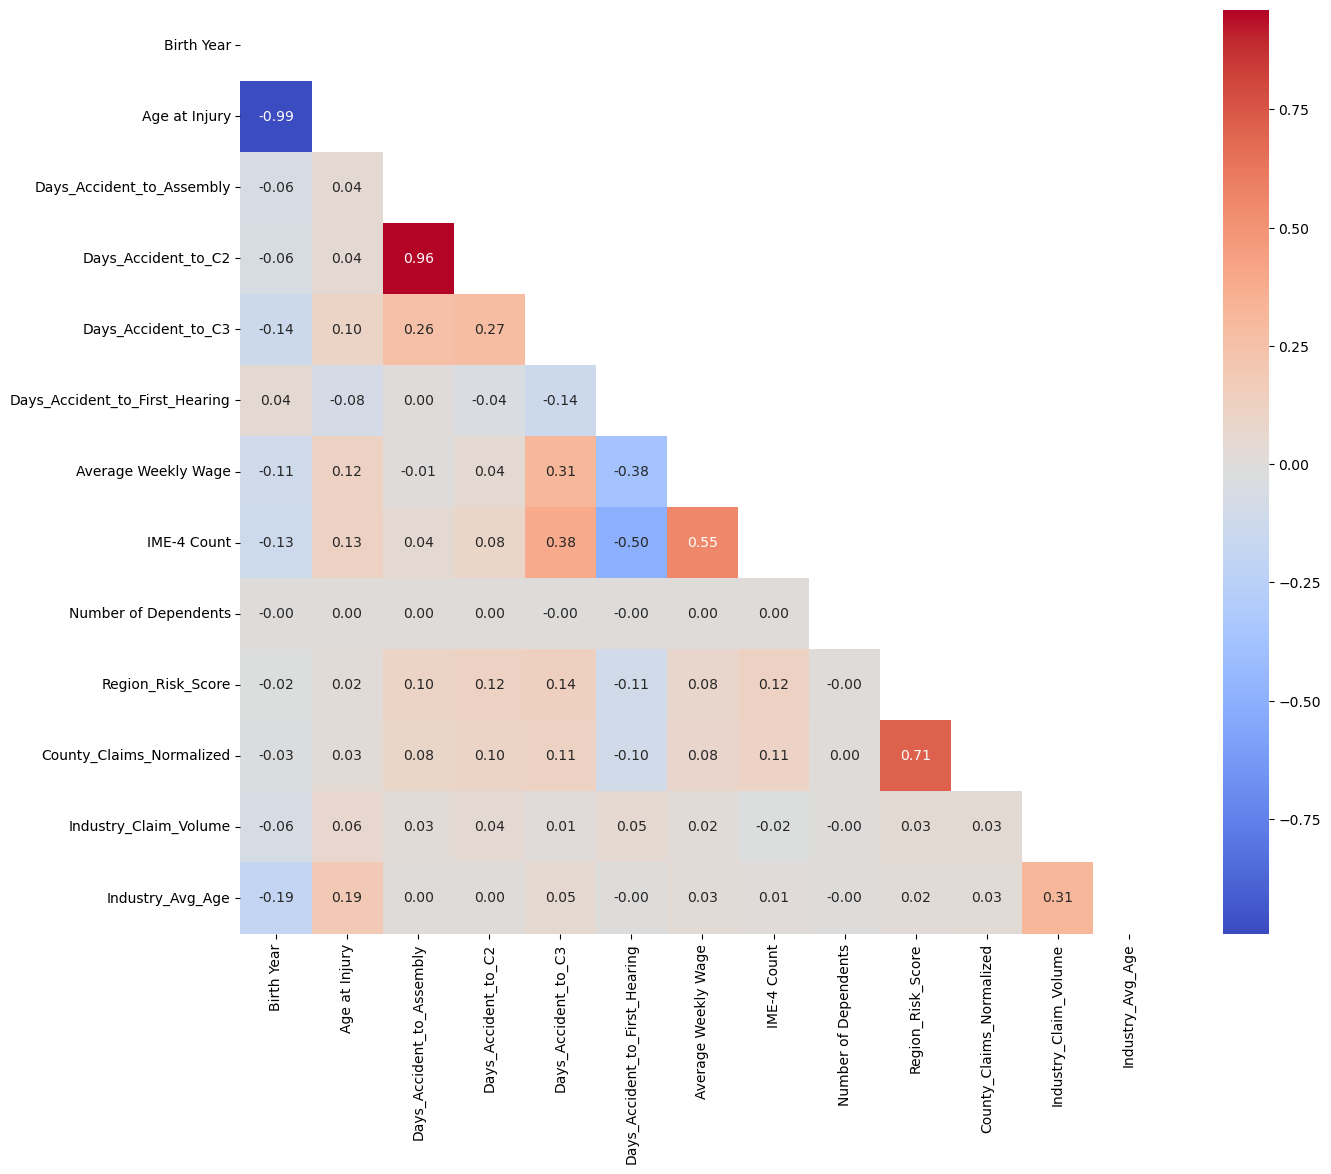

In [86]:
# Calculate the Spearman correlation on numeric columns 
cor_spearman = train_data_metric.corr(method='spearman')
cor_heatmap(cor_spearman)

We consider removing a column if there is a correlation more than 0.85.  \
Same for Birth Year vs Age at Injury (0.99)\
Days_Accident_to_C2 vs Days_Accident_to_Assembly (0.96)

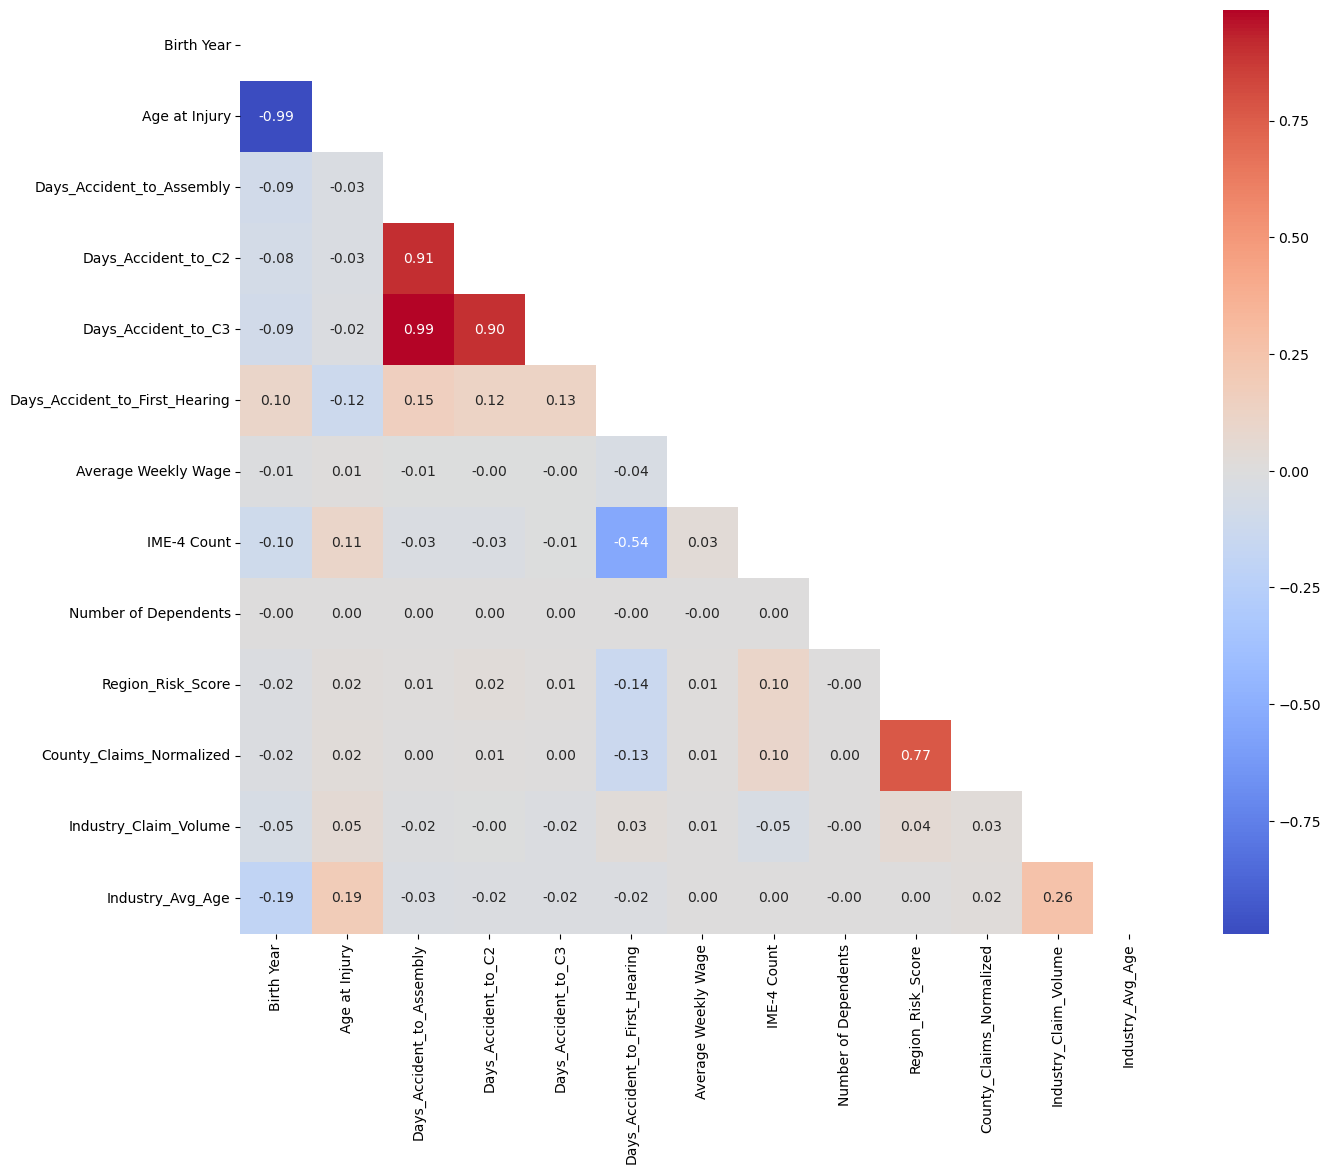

In [88]:
# Calculate the Pearson correlation on numeric columns 
cor_pearson = train_data_metric.corr(method='pearson')
cor_heatmap(cor_pearson)

Birth Year vs Age at Injury (0.99) \
Days_Accident_to_C2 vs Days_Accident_to_Assembly (0.91) \
Days_Accident_to_C3 vs Days_Accident_to_Assembly (0.99) \
Days_Accident_to_C3 vs Days_Accident_to_C2 (0.90) 

#### **Chi-Square for categorical data**

In [93]:
train_data_cat=train_data_scaled[categorical_features]

In [94]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [95]:
for var in train_data_cat:
    TestIndependence(train_data_cat[var],y_train, var)

Alternative Dispute Resolution is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
Carrier Name is IMPORTANT for Prediction
Carrier Type is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Industry Code is IMPORTANT for Prediction
Industry Code Description is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
WCIO Cause of Injury Code is IMPORTANT for Prediction
WCIO Cause of Injury Description is IMPORTANT for Prediction
WCIO Nature of Injury Code is IMPORTANT for Prediction
WCIO Nature of Injury Description is IMPORTANT for Prediction
WCIO Part Of Body Code is IMPORTANT for Prediction
WCIO Part Of Body Description is IMPORTANT for Prediction
Zip Code is IMPORTANT for Prediction
Carrier Name Standardized is IMPORTANT for Prediction
Accident_Month is IMPORTANT for Prediction
Accident_DayOfWeek i

#### **RFE with LogisticRegression**

In [97]:

subset_fraction = 0.2  

# Randomly sample a subset of the data
X_train_subset, _, y_train_subset, _ = train_test_split(train_data_scaled, y_train, test_size=1 - subset_fraction, random_state=42)


nof_list = np.arange(1, 47, 2)
high_score = 0
nof = 0
train_score_list = []
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()

    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_subset, y_train_subset)
    X_val_rfe = rfe.transform(val_data_scaled)  

    model.fit(X_train_rfe, y_train_subset)

    # Storing results on training data using F1 score (macro)
    train_f1 = f1_score(y_train_subset, model.predict(X_train_rfe), average='macro')
    train_score_list.append(train_f1)

    # Storing results on validation data using F1 score (macro)
    val_f1 = f1_score(y_val, model.predict(X_val_rfe), average='macro')
    val_score_list.append(val_f1)

    # Check for the best validation score
    if val_f1 >= high_score:
        high_score = val_f1
        nof = nof_list[n]


print("Optimum number of features: %d" % nof)
print("F1-score (macro) with %d features: %f" % (nof, high_score))

Optimum number of features: 19
F1-score (macro) with 19 features: 0.281499


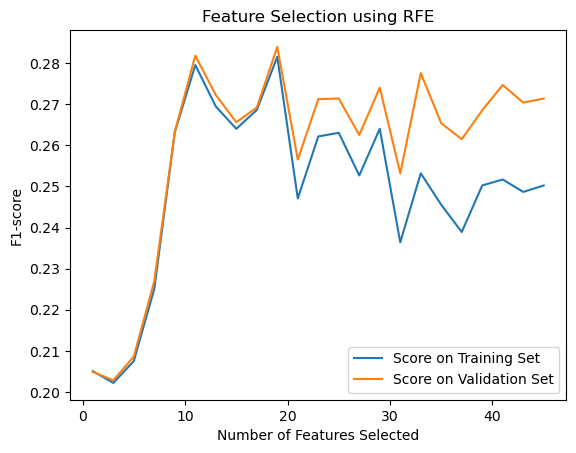

In [98]:
plt.plot(nof_list, val_score_list, label="Score on Training Set")
plt.plot(nof_list, train_score_list, label="Score on Validation Set")
plt.xlabel('Number of Features Selected')
plt.ylabel('F1-score')
plt.title('Feature Selection using RFE')
plt.legend()
plt.show()

In [99]:
rfe = RFE(estimator = model, n_features_to_select = 19)

In [100]:
X_rfe = rfe.fit_transform(X = train_data_scaled, y = y_train)

In [101]:
selected_features = pd.Series(rfe.support_, index = train_data_scaled.columns)
selected_features

Age at Injury                        False
Alternative Dispute Resolution       False
Attorney/Representative               True
Average Weekly Wage                   True
Birth Year                           False
Carrier Name                          True
Carrier Type                          True
County of Injury                     False
COVID-19 Indicator                   False
District Name                         True
Gender                                True
IME-4 Count                           True
Industry Code                        False
Industry Code Description            False
Medical Fee Region                    True
WCIO Cause of Injury Code             True
WCIO Cause of Injury Description      True
WCIO Nature of Injury Code           False
WCIO Nature of Injury Description    False
WCIO Part Of Body Code               False
WCIO Part Of Body Description        False
Zip Code                             False
Number of Dependents                 False
Accident_Da

#### **Random Forest feature**

In [103]:
X_rf = train_data_scaled

In [104]:
model1=RandomForestClassifier(random_state=42)

In [105]:
model1.fit(X_rf, y_train)

RandomForestClassifier(random_state=42)

In [106]:
feature_importances = model1.feature_importances_

In [107]:
feature_importance_df = pd.DataFrame({
    'Feature': X_rf.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

In [108]:
print(feature_importance_df)

                              Feature  Importance
3                 Average Weekly Wage       0.254
40     Days_Accident_to_First_Hearing       0.066
2             Attorney/Representative       0.042
11                        IME-4 Count       0.039
33              IME-4 Count Converted       0.032
38                Days_Accident_to_C2       0.031
21                           Zip Code       0.029
37          Days_Accident_to_Assembly       0.029
4                          Birth Year       0.027
0                       Age at Injury       0.027
20      WCIO Part Of Body Description       0.023
19             WCIO Part Of Body Code       0.023
39                Days_Accident_to_C3       0.022
5                        Carrier Name       0.022
15          WCIO Cause of Injury Code       0.022
32          Carrier Name Standardized       0.022
31       First Hearing Date Converted       0.021
16   WCIO Cause of Injury Description       0.021
35                     Accident_Month       0.021


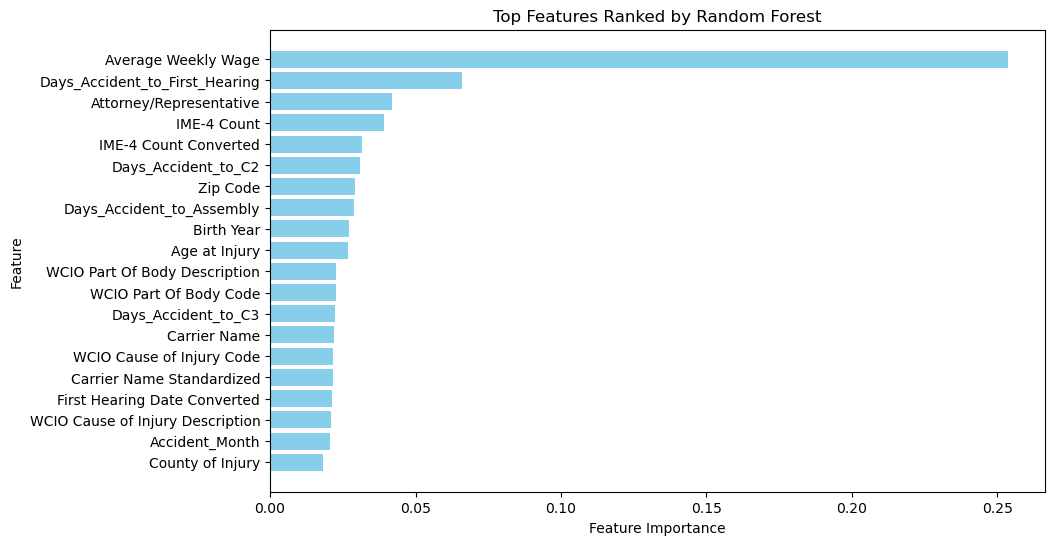

In [109]:
top_n = 20
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top Features Ranked by Random Forest")
plt.show()

#### **Lasso Regression**

In [111]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [112]:
reg = LassoCV()

In [113]:
X_lasso=train_data_scaled

In [114]:
reg.fit(X_lasso, y_train)

LassoCV()

In [115]:
coef=pd.Series(reg.coef_, index = X_lasso.columns)
coef.sort_values()

Attorney/Representative             -0.616
C-3 Date Converted                  -0.480
Age_Outlier_Flag                    -0.297
C3_After_First_Hearing_Flag         -0.273
District Name                       -0.116
Region_Risk_Score                   -0.043
Birth Year                          -0.033
C2_After_Assembly_Flag              -0.032
WCIO Cause of Injury Description    -0.022
WCIO Part Of Body Description       -0.013
IME-4 Count                         -0.013
Industry_Avg_Age                    -0.012
Carrier Type                        -0.008
Accident_DayOfWeek                  -0.003
Days_Accident_to_C2                 -0.002
Days_Accident_to_Assembly           -0.002
Zip Code                            -0.000
Industry_Wage_Rank                  -0.000
Accident_Month                      -0.000
valid_Zip_Code                      -0.000
Days_Accident_to_First_Hearing       0.000
Accident_Date_Flag                   0.000
County_Claims_Normalized             0.000
Age at Inju

In [116]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 34 variables and eliminated the other 12 variables


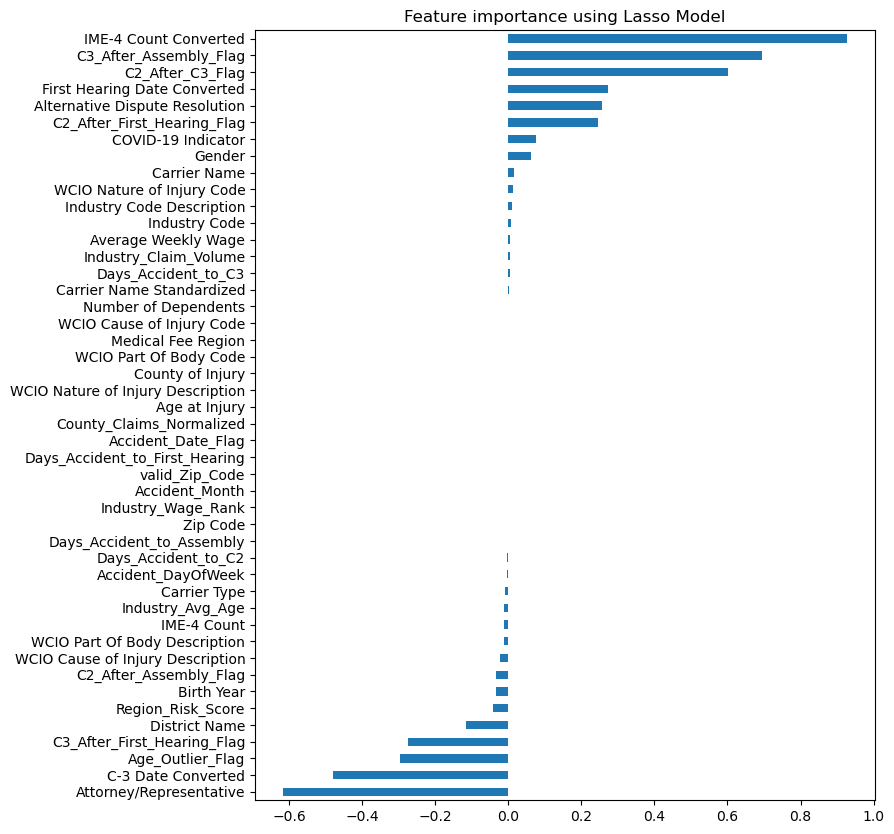

In [117]:
plot_importance(coef,'Lasso')

#### **Ridge Regression**

In [119]:
ridge = RidgeCV()

In [120]:
X_ridge = train_data_scaled

In [121]:
ridge.fit(X_ridge, y_train)

RidgeCV()

In [122]:
print("Best alpha using built-in RidgeCV: %f" % ridge.alpha_)

Best alpha using built-in RidgeCV: 1.000000


In [123]:
print("Best score using built-in RidgeCV: %f" %ridge.score(X_ridge,y_train))

Best score using built-in RidgeCV: 0.463292


In [124]:
coef_ridge = pd.Series(ridge.coef_, index = X_ridge.columns)
coef_ridge.sort_values()

Birth Year                          -0.723
Age at Injury                       -0.697
Attorney/Representative             -0.634
C-3 Date Converted                  -0.631
Age_Outlier_Flag                    -0.522
C3_After_First_Hearing_Flag         -0.421
WCIO Part Of Body Description       -0.251
valid_Zip_Code                      -0.150
District Name                       -0.113
C2_After_Assembly_Flag              -0.100
WCIO Cause of Injury Description    -0.065
Region_Risk_Score                   -0.052
IME-4 Count                         -0.015
Industry_Avg_Age                    -0.014
Carrier Type                        -0.013
Zip Code                            -0.006
Days_Accident_to_Assembly           -0.004
Industry Code Description           -0.003
Accident_DayOfWeek                  -0.002
Carrier Name Standardized           -0.002
Days_Accident_to_C2                 -0.002
Number of Dependents                -0.002
Medical Fee Region                  -0.002
Accident_Mo

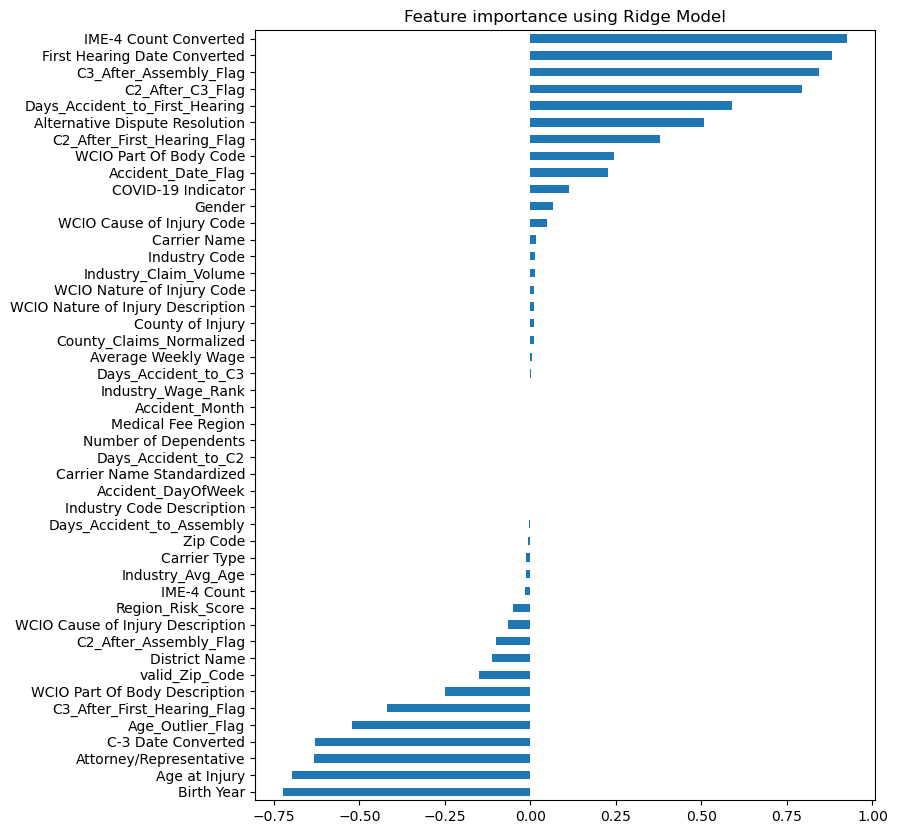

In [125]:
plot_importance(coef_ridge,'Ridge')

#### **ANOVA F-Values**

In [127]:
X_anova = train_data_metric

In [128]:
fval_selector = SelectKBest(f_classif)
X_kbest = fval_selector.fit_transform(X_anova, y_train)

In [129]:
print('Original number of features:', X_anova.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 13
Reduced number of features: 10


In [130]:
cols = fval_selector.get_support(indices=True)
features_to_keep = X_anova.iloc[:,cols]
features_to_keep.columns

Index(['Birth Year', 'Age at Injury', 'Days_Accident_to_Assembly',
       'Days_Accident_to_C2', 'Days_Accident_to_C3',
       'Days_Accident_to_First_Hearing', 'Average Weekly Wage', 'IME-4 Count',
       'Region_Risk_Score', 'County_Claims_Normalized'],
      dtype='object')

#### **Decision Tree to evaluate feature importance**

In [132]:
gini_importance = DecisionTreeClassifier().fit(train_data_scaled, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(train_data_scaled, y_train).feature_importances_

<Axes: xlabel='Value', ylabel='Col'>

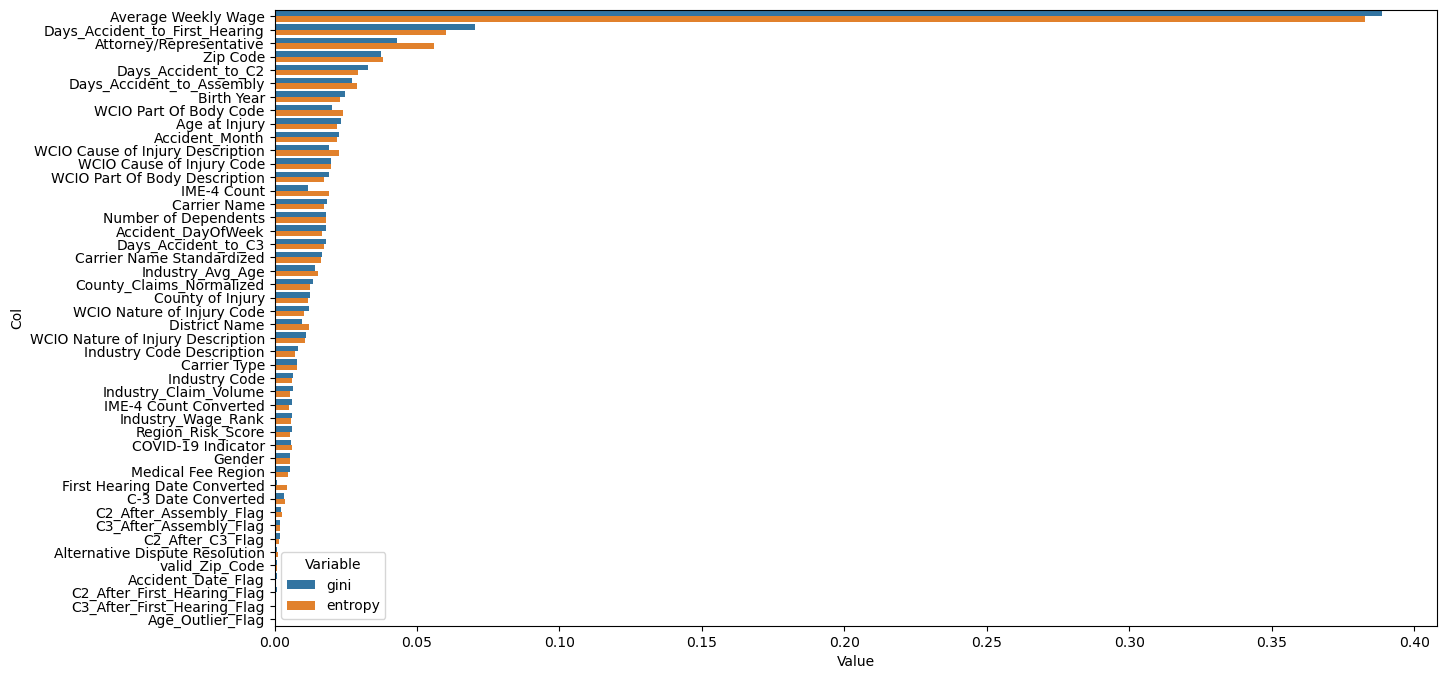

In [133]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = train_data_encoded.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

### **XGBoost to evaluate feature importance**

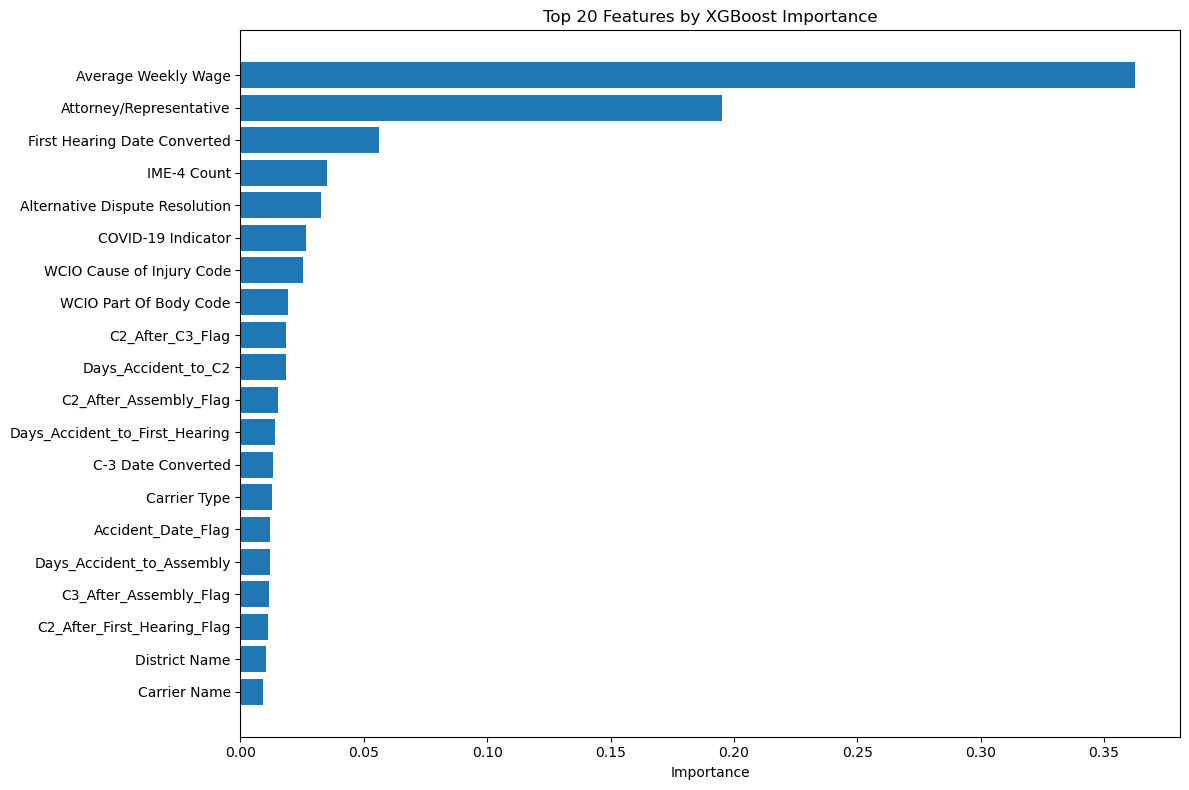


Feature Importance Scores:
                              Feature  Importance
3                 Average Weekly Wage       0.363
2             Attorney/Representative       0.195
31       First Hearing Date Converted       0.056
11                        IME-4 Count       0.035
1      Alternative Dispute Resolution       0.033
8                  COVID-19 Indicator       0.026
15          WCIO Cause of Injury Code       0.025
19             WCIO Part Of Body Code       0.019
25                   C2_After_C3_Flag       0.019
38                Days_Accident_to_C2       0.018
26             C2_After_Assembly_Flag       0.015
40     Days_Accident_to_First_Hearing       0.014
30                 C-3 Date Converted       0.013
6                        Carrier Type       0.013
23                 Accident_Date_Flag       0.012
37          Days_Accident_to_Assembly       0.012
28             C3_After_Assembly_Flag       0.012
27        C2_After_First_Hearing_Flag       0.011
9                     

In [135]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(train_data_scaled, y_train)


feature_importance = pd.DataFrame({
    'Feature': train_data_scaled.columns,
    'Importance': xgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'][:20], feature_importance['Importance'][:20])
plt.title('Top 20 Features by XGBoost Importance')
plt.xlabel('Importance')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

print("\nFeature Importance Scores:")
print(feature_importance)

### **Selected Features**

Based on all the feature methods presented, we gather all the common features with the highest feature importance as well as removing highly correlated and redundant features, resulting in this set of features.

In [138]:
columns_modelling=['Days_Accident_to_First_Hearing','IME-4 Count','Average Weekly Wage','Attorney/Representative',
                   'WCIO Cause of Injury Code','WCIO Part Of Body Code','Region_Risk_Score','C2_After_C3_Flag',
                  'C3_After_Assembly_Flag','C-3 Date Converted','Days_Accident_to_C3','Carrier Name',
                  'Birth Year','Days_Accident_to_Assembly','District Name','Medical Fee Region',
                  'Accident_Month','Age_Outlier_Flag','County_Claims_Normalized']

### **Save data preprocessed**

In [140]:
# Save scaled datasets to CSV
train_data_scaled[columns_modelling].to_csv('train_data_scaled.csv', index=True)
val_data_scaled[columns_modelling].to_csv('val_data_scaled.csv', index=True)
test_data_scaled[columns_modelling].to_csv('test_data_scaled.csv', index=True)
y_train.to_csv('y_train.csv', index=True, header=['Claim Injury Type'])
y_val.to_csv('y_val.csv', index=True, header=['Claim Injury Type'])